<a href="https://colab.research.google.com/github/Jueunkim429/Human-Computer-Interaction/blob/main/Coronary_artery_disease_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비하기

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class' ]
cleveland= pd.read_csv(url, names=names)

In [3]:
print('Shape of DataFrame: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


## 데이터 탐색

In [4]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


# 결측값 처리

In [5]:
data= cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


## NaN을 갖고 있는 행을 데이터프레임에서 완전히 제거 -> dropna()

In [6]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [7]:
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [8]:
data=data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

# 데이터셋 속성 검토

## 1) 요약 통계량 확인

In [9]:
# 판다스 describe() 함수로 변수의 특징 확인
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


## 2) 변수 분포

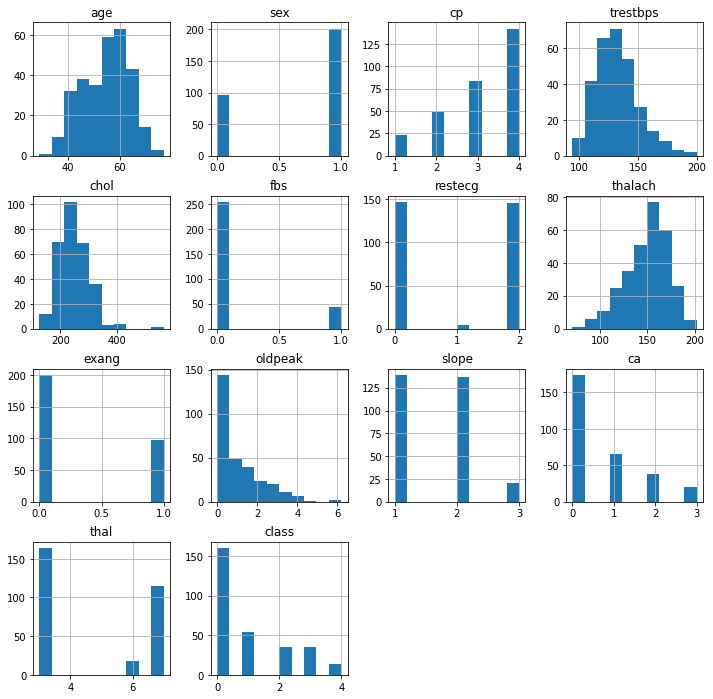

In [10]:
# 각 변수에 대한 히스토그램
data.hist(figsize=(12,12));
plt.show()

# 데이터셋 분리

## 훈련 데이터셋과 테스트셋으로 분리

In [12]:
# 훈련용 데이터셋인 X, y(타깃) 데이터셋 만들기
from sklearn import model_selection
X= np.array(data.drop('class', axis=1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=42)

# 데이터셋 준비

In [13]:
# 카테고리형 데이터를 원-핫 벡터로 변환
import tensorflow as tf
from tensorflow import keras

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


# 신경망 모델 설계

In [14]:
from tensorflow import keras

# 케라스 모델을 만들기 위한 사용자 정의함수 만들기
def create_model():
  # 모델 생성
  model=keras.models.Sequential()
  model.add(keras.layers.Dense(8,input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dense(4,kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dense(5,activation='softmax'))

  # 모델 컴파일
  adam=keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [15]:
model = create_model()

print(model)

# 신경망 모델 훈련

In [16]:
# 모델을 훈련 데이터에 적합
model.fit(X_train, Y_train, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.6140 - accuracy: 0.4051
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.6003 - accuracy: 0.5274
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5929 - accuracy: 0.5232
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5862 - accuracy: 0.5232
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5796 - accuracy: 0.5232
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5731 - accuracy: 0.5274
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5663 - accuracy: 0.5316
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5602 - accuracy: 0.5359
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5539 - accuracy: 0.5316
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5474 - accuracy: 0.5316
Epoch 11/

# 이진 분류 만들기

In [17]:
# 이진 분류 문제로 변환- 심장 질환의 유무
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0]


# 이진 분류 모델 정의

In [18]:
from tensorflow.python import metrics
from tensorflow import keras
# 이진 분류를 위해 새로운 케라스 모델 정의
def create_binary_model():
  # 모델 생성
  model=keras.models.Sequential()
  model.add(keras.layers.Dense(8,input_dim=13, kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dense(4,kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dense(1,activation='sigmoid'))

  # 모델 컴파일
  adam=keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


# 신경망 모델 훈련

In [19]:
# 훈련 데이터셋에 이진 모델을 적합
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4810
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5232
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5232
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5232
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5232
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5232
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5232
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5232
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5232
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5232
Epoch 11/

# 성능 평가

In [20]:
# 다중 분류 문제
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)
categorical_pred 

array([0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 3])

In [21]:
# 다중 분류 모델에 대한 예측값을 사용한 분류 보고서 생성
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('다중 분류 모델에 대한 결과')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

다중 분류 모델에 대한 결과
0.6333333333333333
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        36
           1       0.25      0.11      0.15         9
           2       0.00      0.00      0.00         5
           3       0.27      0.43      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.26      0.30      0.27        60
weighted avg       0.52      0.63      0.57        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# 이진 모델의 예측값에 대한 분류 보고서 작성
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('이진 모델에 대한 결과')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

이진 모델에 대한 결과
0.6
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        36
           1       0.00      0.00      0.00        24

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 성능을 높여보기

## 준비하기

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class' ]
df= pd.read_csv(url, names=names)

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 데이터 전처리

In [25]:
df.dropna(inplace=True)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [26]:
dataset = df.values
print(dataset.shape)

(303, 14)


### 데이터셋 분리

In [27]:
X = dataset[:, 0:8]
Y = dataset[:, 8].astype(int)

In [28]:
print(X.shape)
print(Y.shape)
print(X[:5])
print(Y[:5])

(303, 8)
(303,)
[[63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0]
 [67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0]
 [67.0 1.0 4.0 120.0 229.0 0.0 2.0 129.0]
 [37.0 1.0 3.0 130.0 250.0 0.0 0.0 187.0]
 [41.0 0.0 2.0 130.0 204.0 0.0 2.0 172.0]]
[0 1 1 0 0]


### 데이터 정규화

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

In [39]:
X_standardized = scaler.transform(X)
data = pd.DataFrame(X_standardized)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,303.0,-1.465641e-18,1.001654,-2.819115,-0.713556,0.172994,0.727089,2.500191
1,303.0,-2.931282e-17,1.001654,-1.457296,-1.457296,0.686202,0.686202,0.686202
2,303.0,-1.670831e-16,1.001654,-2.251775,-0.165268,-0.165268,0.877985,0.877985
3,303.0,4.426236e-16,1.001654,-2.145037,-0.665300,-0.096170,0.472960,3.887739
4,303.0,2.345026e-16,1.001654,-2.334877,-0.690503,-0.110136,0.547614,6.138485
5,303.0,-1.172513e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
6,303.0,-1.172513e-17,1.001654,-0.996749,-0.996749,0.009967,1.016684,1.016684
7,303.0,-1.172513e-16,1.001654,-3.442067,-0.705307,0.148562,0.717808,2.294182


## 케라스 모델 정의

In [29]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=886cec7d407c753a5196cabb09e36a0895503ff69a7acff8da25f43ff58cf6c3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [31]:
import tensorflow as tf
from tensorflow import keras

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [32]:
seed = 6
np.random.seed(seed)

def create_model() :
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(8, input_dim=8,kernel_initializer='normal', activation='relu' ))
  model.add(keras.layers.Dense(4, kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  adam = keras.optimizers.Adam(learning_rate=0.01)

  model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [33]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


## 그리드 탐색 실행하기

In [34]:
model = KerasClassifier(model=create_model)

In [35]:
batch_size=[10,20,40]
epochs = [10,50,100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [40]:
grid =GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=KFold(random_state=seed, shuffle=True), verbose=0)
grid_results=grid.fit(X_standardized, Y)

Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.6512 - accuracy: 0.6570
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.6818
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7603
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7686
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7851
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8058
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8017
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8140
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8058
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
25/25 [==============================] - 1s 

2/2 [==============================] - 0s 4ms/step
Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 0.6872 - accuracy: 0.6281
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6901
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6983
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7314
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7810
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7769
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7562
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7975
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7934
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4779 - accur

2/2 [==============================] - 0s 9ms/step
Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 0.6900 - accuracy: 0.5967
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.7119
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.7407
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7860
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.7901
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7901
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7901
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.8025
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
Epoch 1/10
7/7 [======

### 결과를 보고하는 코드

In [41]:
print("Best : {0}, **using** {1}".format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
  print('{0} ({1}) with : {2}'.format(mean, stdev, param))

Best : 0.7985792349726776, **using** {'batch_size': 40, 'epochs': 100}
0.7950819672131149 (0.04515923168650649) with : {'batch_size': 10, 'epochs': 10}
0.7589617486338798 (0.03164420435128131) with : {'batch_size': 10, 'epochs': 50}
0.7691803278688525 (0.031546387034364395) with : {'batch_size': 10, 'epochs': 100}
0.7458469945355192 (0.07807142665806621) with : {'batch_size': 20, 'epochs': 10}
0.788743169398907 (0.026463776225599544) with : {'batch_size': 20, 'epochs': 50}
0.7525136612021859 (0.047516607028530965) with : {'batch_size': 20, 'epochs': 100}
0.7524043715846995 (0.04321654753896768) with : {'batch_size': 40, 'epochs': 10}
0.7787431693989071 (0.03318177495278532) with : {'batch_size': 40, 'epochs': 50}
0.7985792349726776 (0.027053540521792176) with : {'batch_size': 40, 'epochs': 100}


## 드롭아웃 정규화

In [42]:
seed = 6
np.random.seed(seed)

def create_model(learn_rate, dropout_rate):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(8,input_dim=8, kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(4, kernel_initializer='normal', activation='relu'))
  model.add(keras.layers.Dropout(dropout_rate))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  adam = keras.optimizers.Adam(learning_rate=learn_rate)

  model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [43]:
model = KerasClassifier(model=create_model, epochs=50, batch_size=40, verbose=0)

In [44]:
learn_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

param_grid = dict(model__learn_rate=learn_rate, model__dropout_rate=dropout_rate)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=KFold(random_state=seed, shuffle=True), verbose = 0)
grid_results=grid.fit(X_standardized,Y)

### 결과를 보고하는 코드

In [45]:
print("Best : {0}, **using** {1}".format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
  print('{0} ({1}) with : {2}'.format(mean, stdev, param))

Best : 0.788743169398907, **using** {'model__dropout_rate': 0.0, 'model__learn_rate': 0.01}
0.7391803278688525 (0.08860982201986586) with : {'model__dropout_rate': 0.0, 'model__learn_rate': 0.001}
0.788743169398907 (0.022030330984645297) with : {'model__dropout_rate': 0.0, 'model__learn_rate': 0.01}
0.6831147540983606 (0.013385636016833286) with : {'model__dropout_rate': 0.0, 'model__learn_rate': 0.1}
0.7230054644808744 (0.07370375447162508) with : {'model__dropout_rate': 0.1, 'model__learn_rate': 0.001}
0.7753551912568305 (0.040990309105841505) with : {'model__dropout_rate': 0.1, 'model__learn_rate': 0.01}
0.7224590163934426 (0.03910690394035065) with : {'model__dropout_rate': 0.1, 'model__learn_rate': 0.1}
0.7394535519125682 (0.03216839222760074) with : {'model__dropout_rate': 0.2, 'model__learn_rate': 0.001}
0.7589617486338798 (0.03466841691017862) with : {'model__dropout_rate': 0.2, 'model__learn_rate': 0.01}
0.6766120218579236 (0.037783477200128326) with : {'model__dropout_rate': 

## 최적 초매개변수 찾기

In [46]:
seed = 6
np.random.seed(seed)

def create_model(init, activation):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(8,input_dim=8, kernel_initializer=init, activation=activation))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(4, kernel_initializer=init, activation=activation))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  adam = keras.optimizers.Adam(learning_rate=0.01)

  model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [47]:
model = KerasClassifier(model=create_model, epochs=50, batch_size=40, verbose=0)

In [48]:
activation=['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

param_grid = dict(model__activation=activation, model__init=init)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=KFold(random_state=seed, shuffle=True), verbose = 0)
grid_results=grid.fit(X_standardized,Y)

### 결과를 보고하는 코드

In [ ]:
print("Best : {0}, **using** {1}".format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
  print('{0} ({1}) with : {2}'.format(mean, stdev, param))

Best : 0.7885792349726776, **using** {'model__activation': 'tanh', 'model__init': 'normal'}
0.7753005464480874 (0.050711324656784094) with : {'model__activation': 'softmax', 'model__init': 'uniform'}
0.7820218579234972 (0.044075840160648104) with : {'model__activation': 'softmax', 'model__init': 'normal'}
0.7689071038251366 (0.029964295394304095) with : {'model__activation': 'softmax', 'model__init': 'zero'}
0.7555737704918034 (0.044460730391277396) with : {'model__activation': 'relu', 'model__init': 'uniform'}
0.7359016393442623 (0.03332150645692284) with : {'model__activation': 'relu', 'model__init': 'normal'}
0.6732786885245902 (0.037778656019075936) with : {'model__activation': 'relu', 'model__init': 'zero'}
0.765464480874317 (0.035062470111159004) with : {'model__activation': 'tanh', 'model__init': 'uniform'}
0.7885792349726776 (0.03479909106040836) with : {'model__activation': 'tanh', 'model__init': 'normal'}
0.6732786885245902 (0.037778656019075936) with : {'model__activation': 

## 뉴런의 개수 최적화

In [49]:
seed = 6
np.random.seed(seed)

def create_model(neuron1, neuron2):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(neuron1,input_dim=8, kernel_initializer='uniform', activation='linear'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(neuron2,  kernel_initializer='uniform', activation='linear'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  adam = keras.optimizers.Adam(learning_rate=0.01)

  model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [50]:
model = KerasClassifier(model=create_model, epochs=50, batch_size=40, verbose=0)

In [51]:
neuron1=[4,8,16]
neuron2 = [2,4,8]

param_grid = dict(model__neuron1=neuron1, model__neuron2=neuron2)

grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=KFold(random_state=seed, shuffle=True), verbose = 0)
grid_results=grid.fit(X_standardized,Y)

### 결과를 보고하는 코드

In [52]:
print("Best : {0}, **using** {1}".format(grid_results.best_score_,grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
  print('{0} ({1}) with : {2}'.format(mean, stdev, param))

Best : 0.7885245901639344, **using** {'model__neuron1': 16, 'model__neuron2': 2}
0.7622404371584699 (0.027852990235630738) with : {'model__neuron1': 4, 'model__neuron2': 2}
0.7556284153005464 (0.025570968040368465) with : {'model__neuron1': 4, 'model__neuron2': 4}
0.755464480874317 (0.04983354897298462) with : {'model__neuron1': 4, 'model__neuron2': 8}
0.781912568306011 (0.04228971598668693) with : {'model__neuron1': 8, 'model__neuron2': 2}
0.7720765027322404 (0.033318280216570705) with : {'model__neuron1': 8, 'model__neuron2': 4}
0.7753551912568306 (0.0286395105630333) with : {'model__neuron1': 8, 'model__neuron2': 8}
0.7885245901639344 (0.03814779107613144) with : {'model__neuron1': 16, 'model__neuron2': 2}
0.7655191256830601 (0.025790034164836155) with : {'model__neuron1': 16, 'model__neuron2': 4}
0.7720765027322404 (0.028064458721870075) with : {'model__neuron1': 16, 'model__neuron2': 8}


## 최적의 초매개변수를 사용해 예측하기

In [53]:
# 최적 초매개변수를 가지고 예측값 생성
import numpy as np
y_pred=grid.predict(X_standardized)

In [54]:
print(y_pred.shape)

(303,)


In [55]:
print(y_pred[:5])

[0 1 1 0 0]


In [56]:
print(Y[:5])

[0 1 1 0 0]


In [57]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

0.7821782178217822
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       204
           1       0.74      0.52      0.61        99

    accuracy                           0.78       303
   macro avg       0.77      0.71      0.73       303
weighted avg       0.78      0.78      0.77       303



## 하나의 사례에 대한 예측

In [58]:
example = df.iloc[1]
print(example)

age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [59]:
prediction = grid.predict(X_standardized[1].reshape(1,-1))
print(prediction)

[1]
